In [2]:
# Import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

# from keras.optimizers import gradient_descent_v2
# plt.style.use('seaborn-whitegrid') 

2023-11-12 23:20:07.953575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Import the statistic for all stocks
stockList = ["INTC", "PFE", "CMCSA", "SAP", "TMUS", "TMO", "AMD", "NVS", "LIN", "MCD", "NFLX", "AZN", "ACN", "CRM", "BABA", "FMX", "CSCO", "SHEL", "BAC", "PEP", "ABBV", "KO", "TM", "COST", "MRK", "ASML", "CVX", "ADBE", "HD", "ORCL", "JNJ", "PG", "MA", "AVGO", "XOM", "JPM", "WMT", "NVO", "UNH", "TSM", "V", "LLY", "TSLA", "BRK-B", "META", "NVDA", "AMZN", "GOOGL", "MSFT", "AAPL"]

In [4]:
df_ = {}
for i in stockList:
    df_[i] = pd.read_csv("Data/"+i+".csv", index_col="Date", parse_dates=["Date"])

In [5]:
def split(dataframe, border):
    return dataframe.loc[:border].copy(), dataframe.loc[border:].copy()

df_new = {}
for i in stockList:
    df_new[i] = {}
    df_new[i]["Train"], df_new[i]["Test"] = split(df_[i], "2022-01-01")
    #if i == "AAPL":
        #print(df_new[i]["Train"])
        #print(df_new[i]["Test"])

In [6]:
for i in stockList:
    if i == "AAPL":
        fuck = np.array(df_new[i]["Train"])
        print(fuck)

[[2.67800007e+01 2.72175007e+01 2.66375008e+01 2.71075001e+01
  2.52275562e+01 1.36575600e+08]
 [2.69274998e+01 2.69524994e+01 2.60200005e+01 2.64274998e+01
  2.45947094e+01 2.04702000e+08]
 [2.66424999e+01 2.69200001e+01 2.65400009e+01 2.67775002e+01
  2.49204407e+01 1.29058000e+08]
 ...
 [1.79330002e+02 1.80630005e+02 1.78139999e+02 1.79380005e+02
  1.77353607e+02 6.23489000e+07]
 [1.79470001e+02 1.80570007e+02 1.78089996e+02 1.78199997e+02
  1.76186935e+02 5.97730000e+07]
 [1.78089996e+02 1.79229996e+02 1.77259995e+02 1.77570007e+02
  1.75564072e+02 6.40623000e+07]]


/var/folders/t8/6jkdwknn67v62v405wjsjgnm0000gn/T/ipykernel_8729/3595984756.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,4))


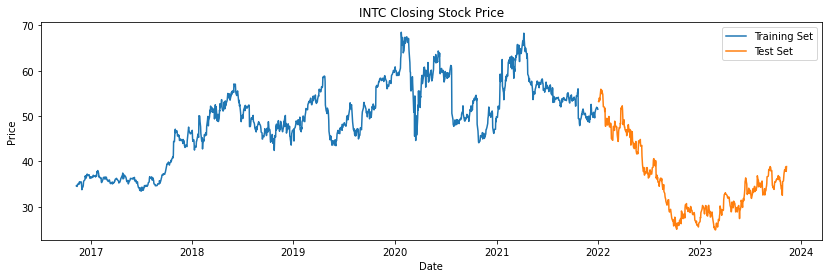

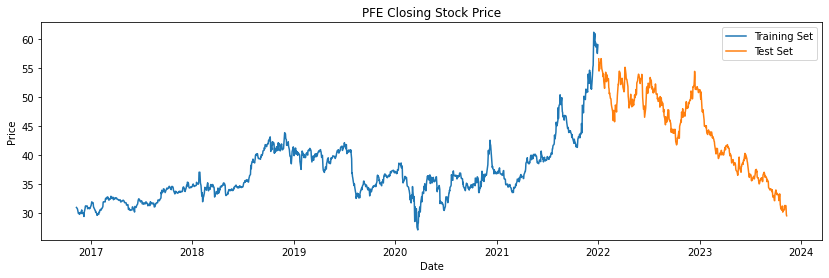

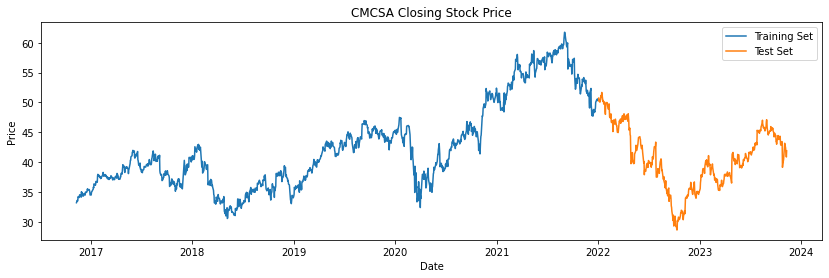

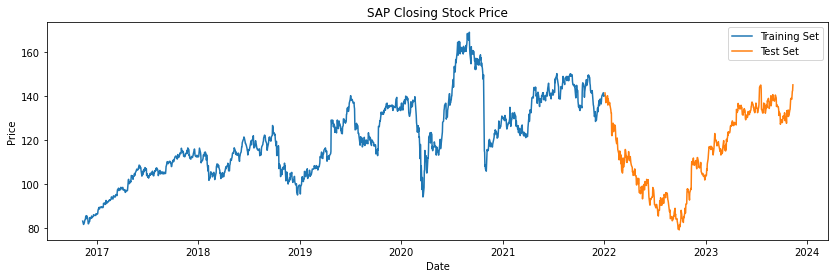

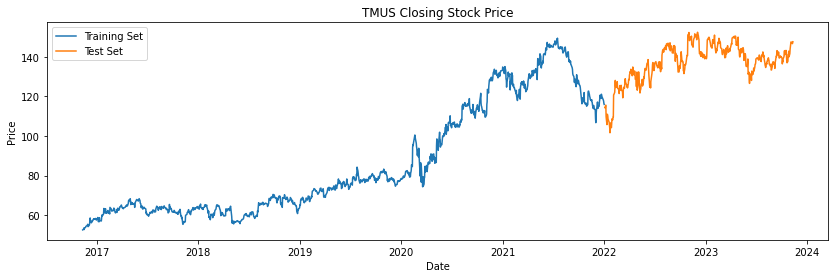

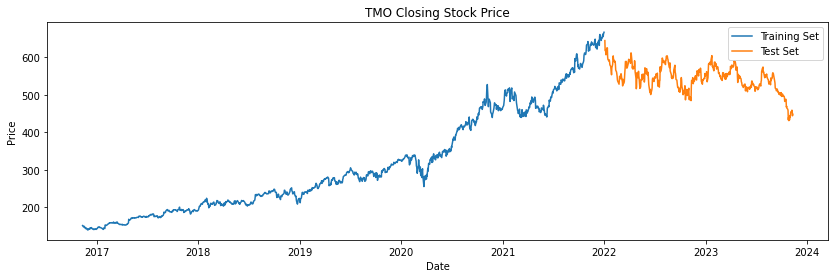

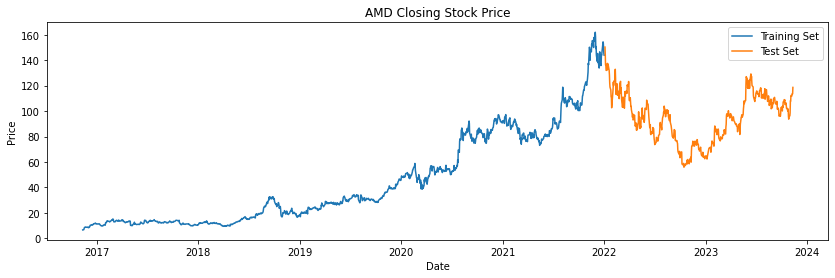

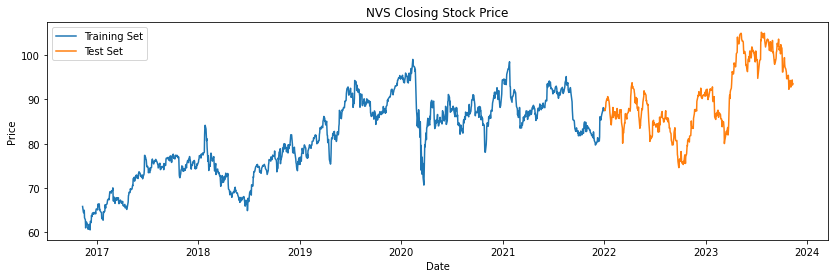

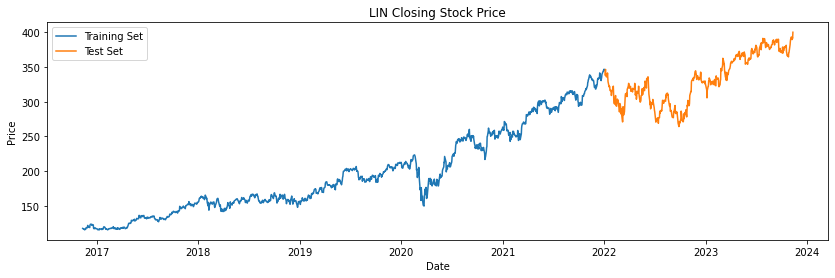

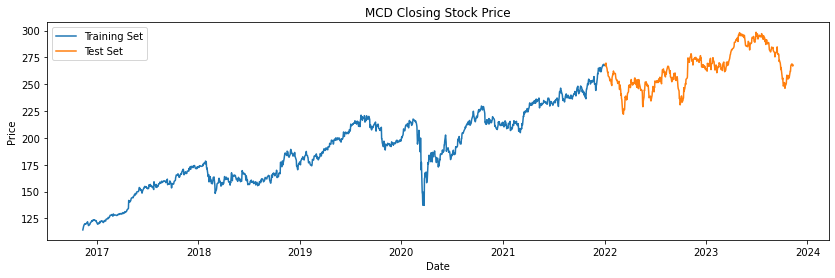

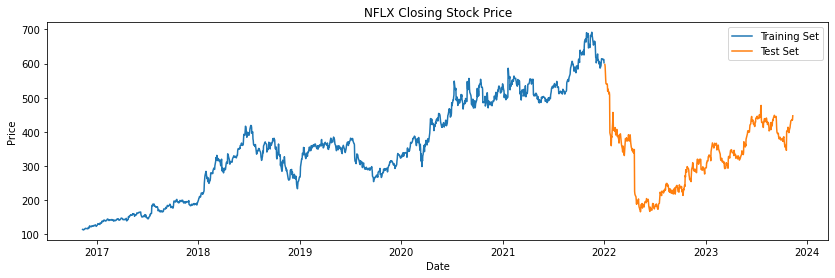

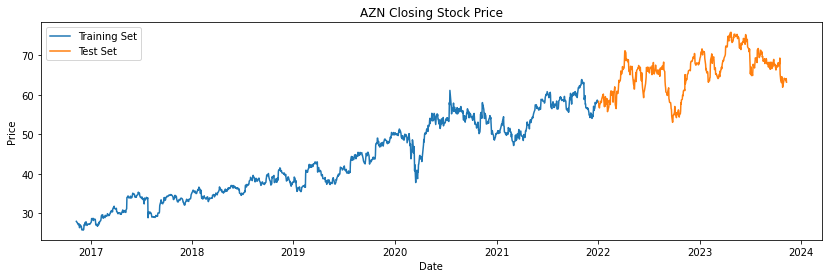

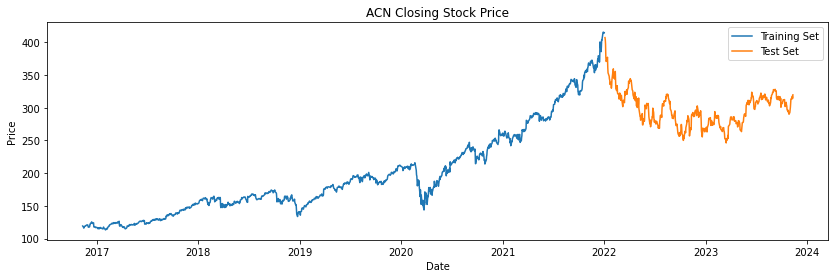

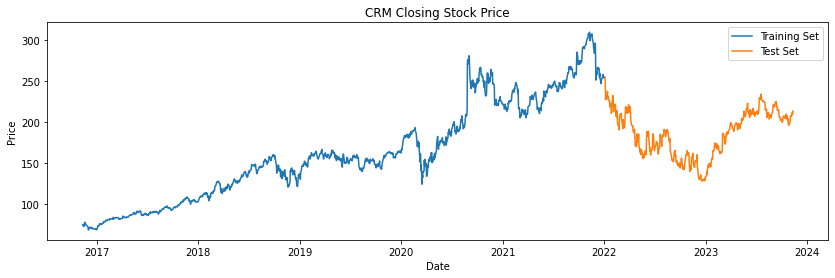

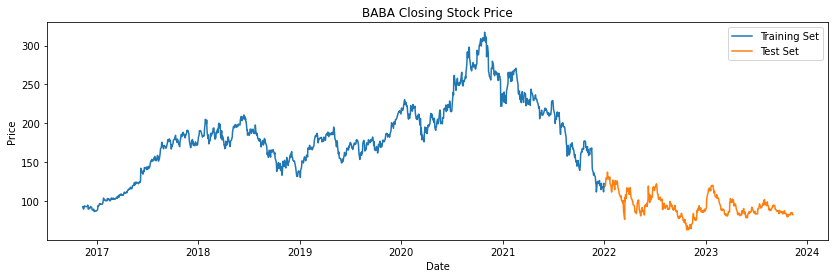

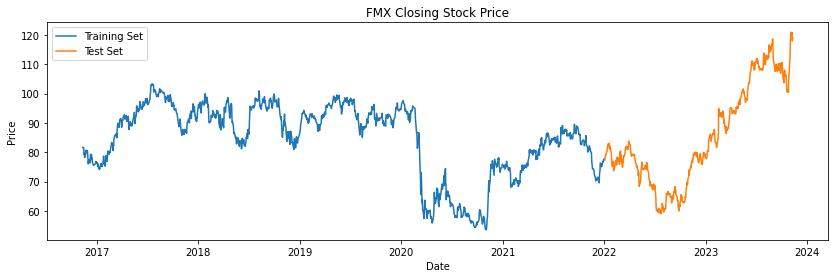

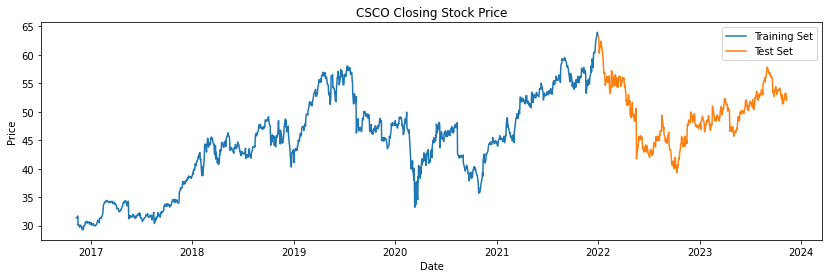

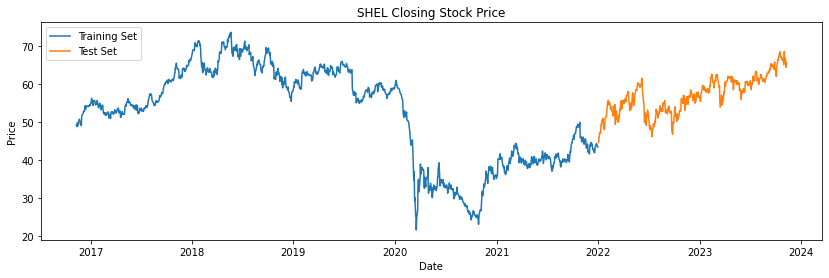

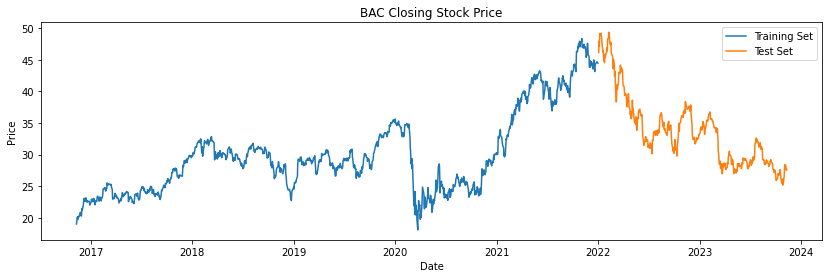

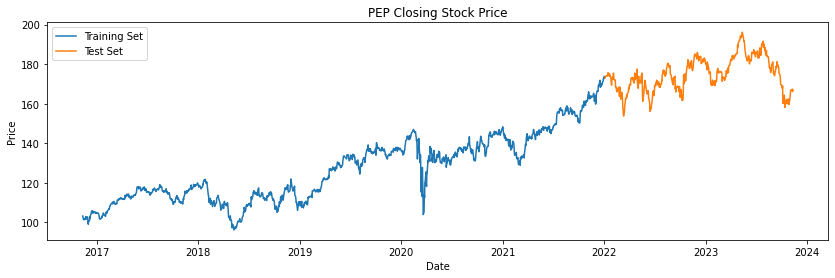

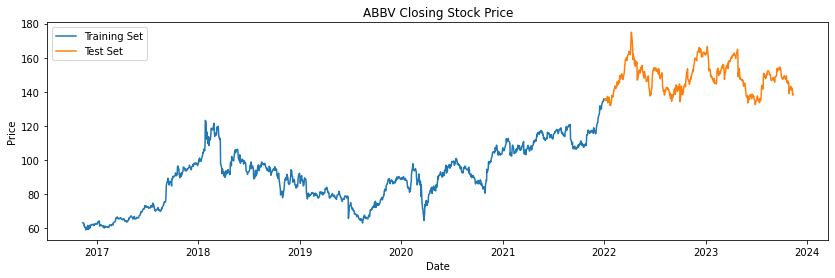

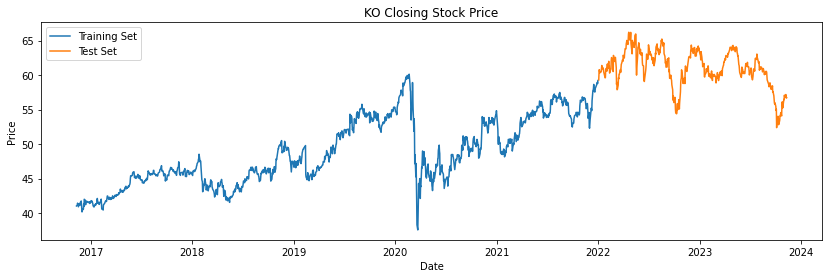

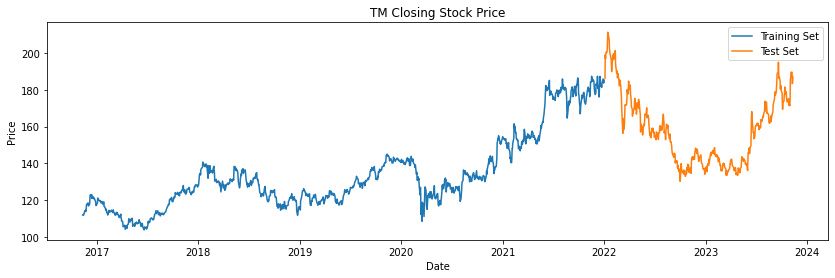

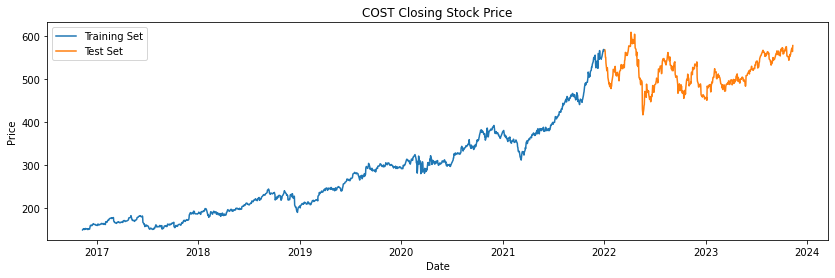

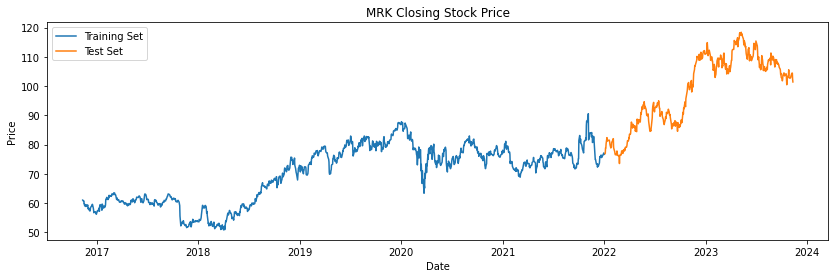

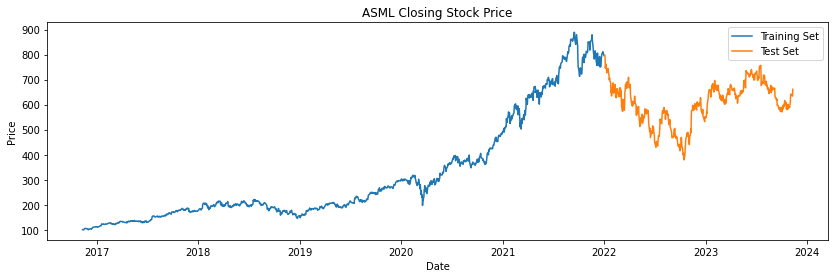

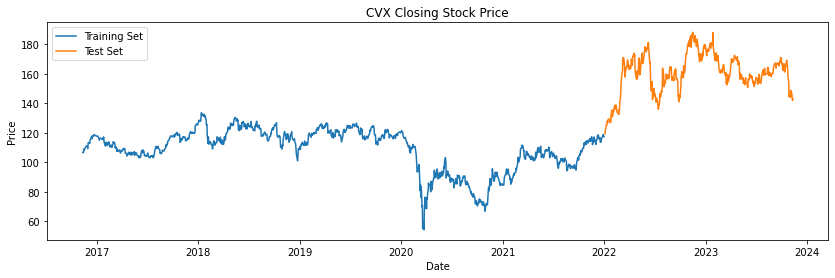

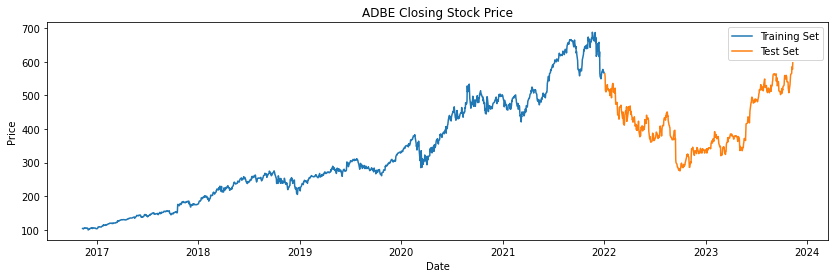

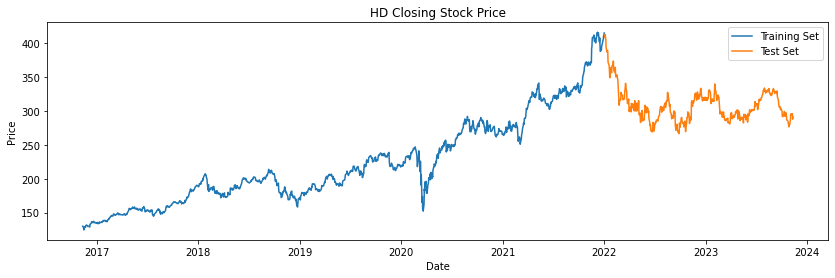

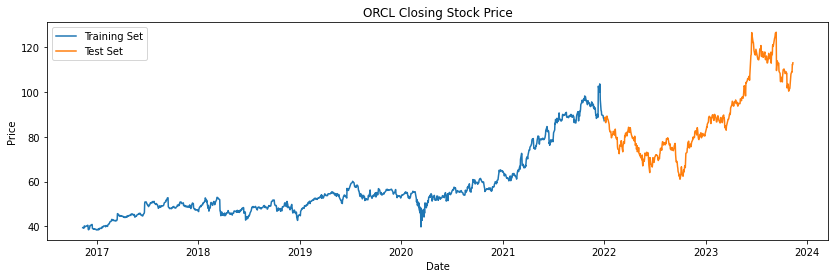

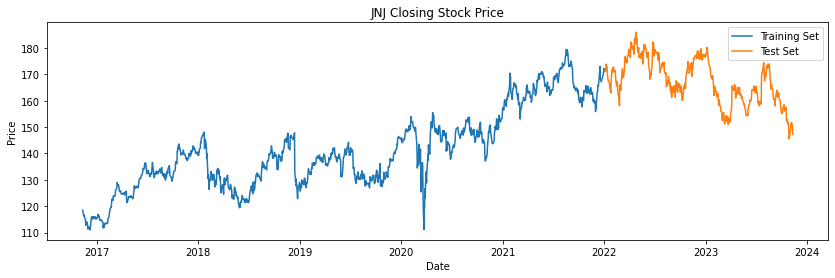

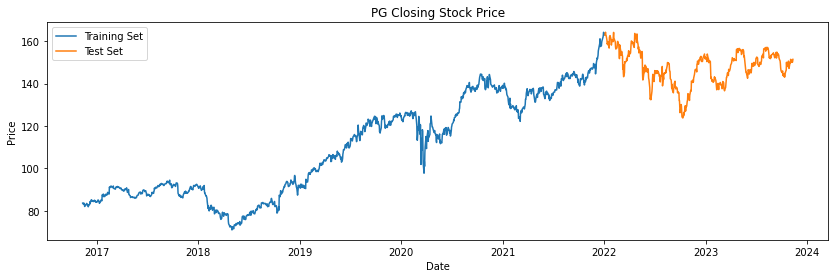

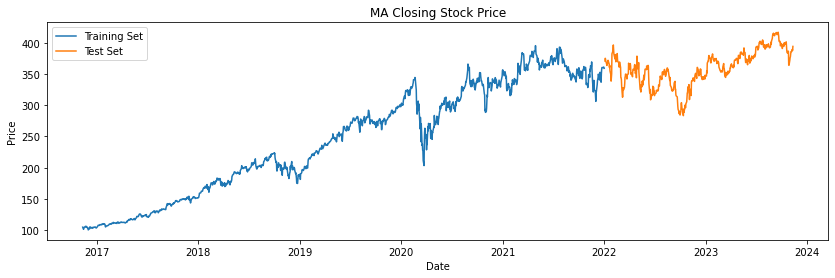

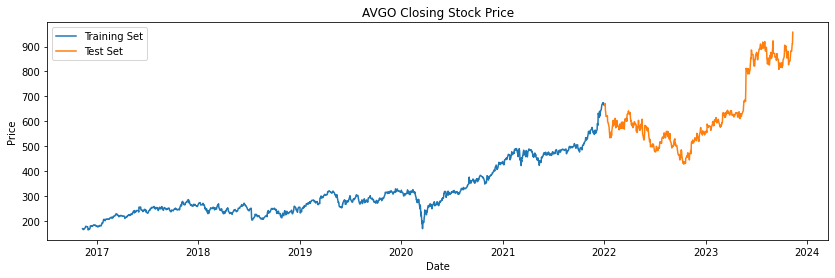

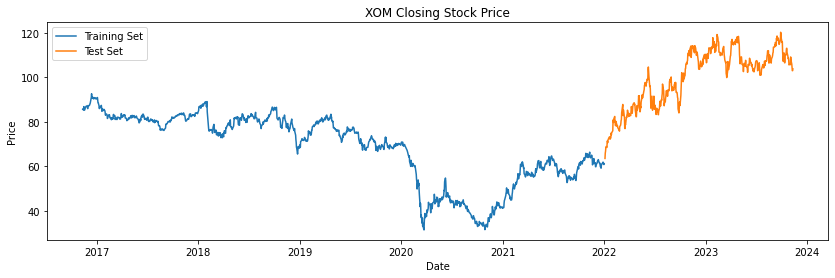

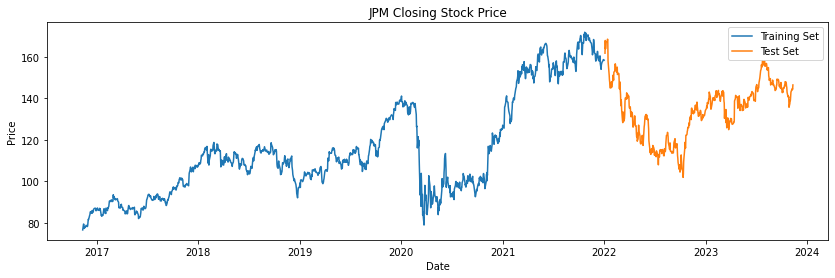

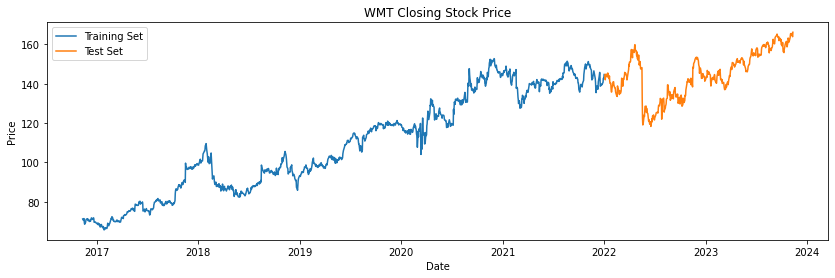

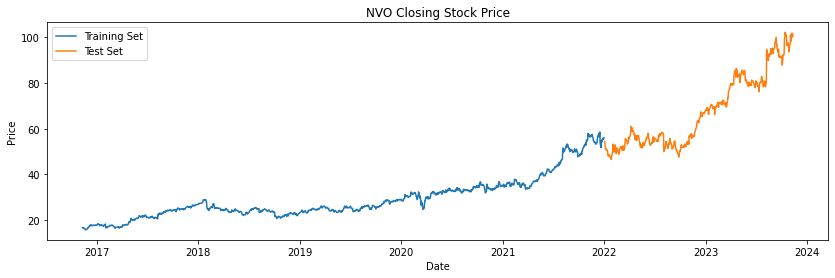

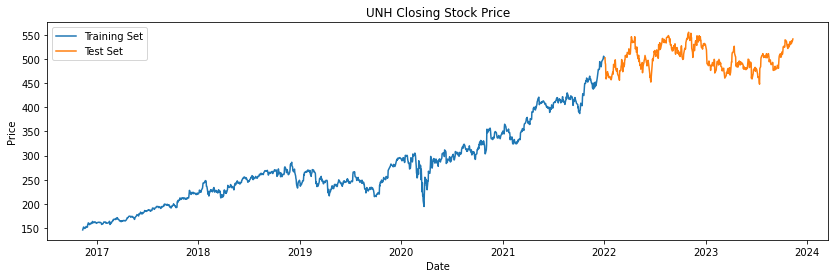

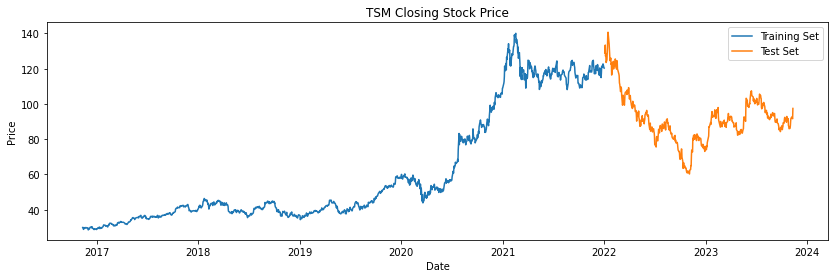

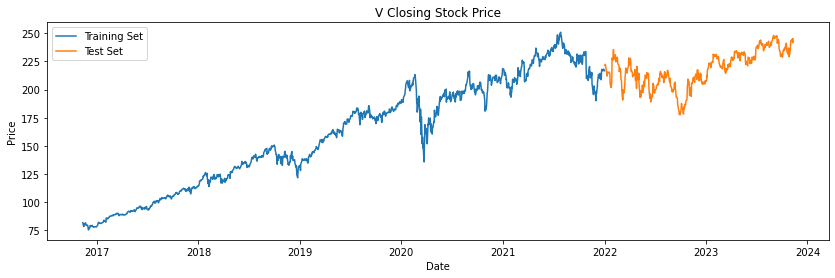

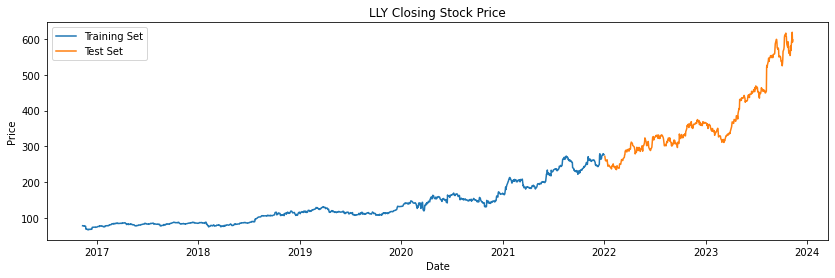

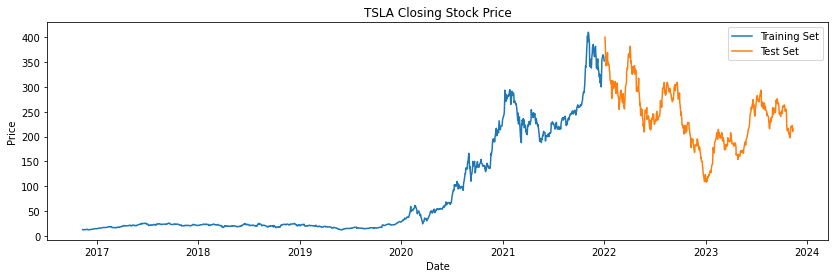

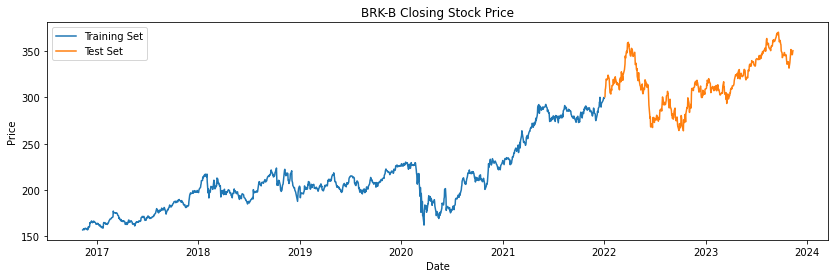

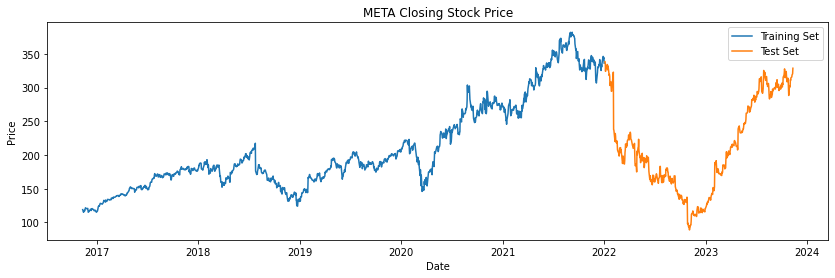

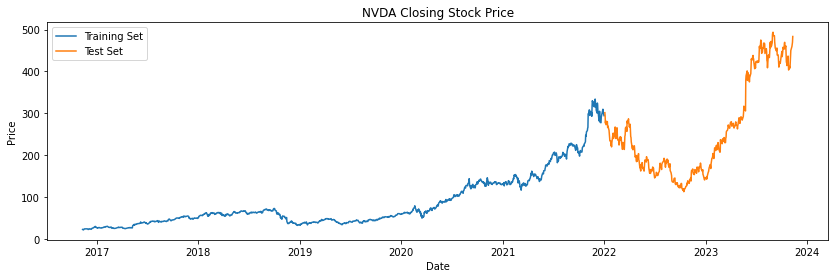

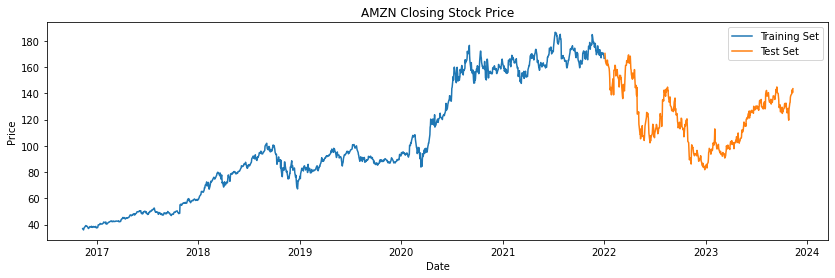

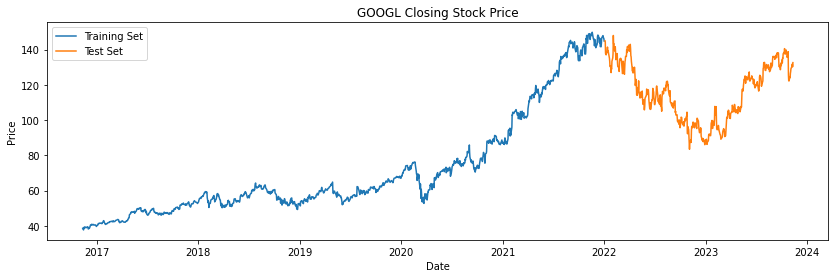

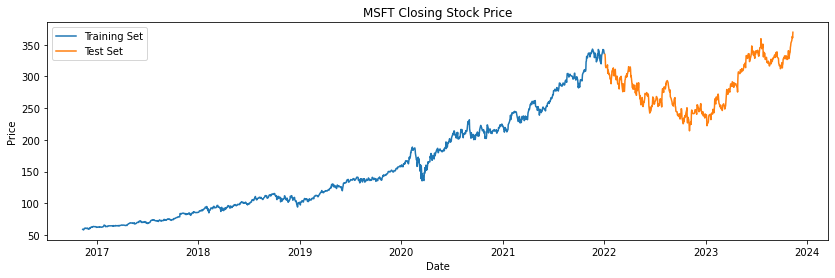

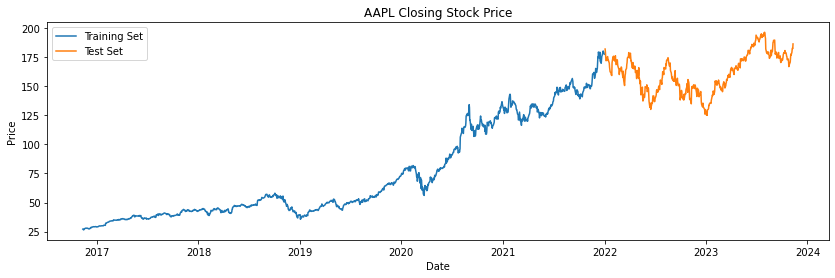

In [7]:
for i in stockList:
    plt.figure(figsize=(14,4))
    plt.plot(df_new[i]["Train"]["Close"])
    plt.plot(df_new[i]["Test"]["Close"])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [8]:
# Initialize the number of features
featuresize = 6

# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stockList):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(df_new[i]["Train"])
    a1 = np.array(df_new[i]["Test"])

    #if num == 49:
        #print(a0)
    a0 = a0.reshape(a0.shape[0],featuresize)
    a1 = a1.reshape(a1.shape[0],featuresize)

    #if num == 49:
        #print(a0)

    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc

    if num == 49:
       print(transform_train[i])



del a0
del a1

[[8.90102230e-04 1.91676181e-03 4.04891687e-03 4.41838369e-03
  4.11746422e-03 2.34864108e-01]
 [1.84492794e-03 2.09389294e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.02275520e-01]
 [0.00000000e+00 0.00000000e+00 3.40961552e-03 2.27416953e-03
  2.11929145e-03 2.16390623e-01]
 ...
 [9.88412595e-01 9.90335675e-01 9.97442795e-01 9.93827281e-01
  9.93888669e-01 5.24620337e-02]
 [9.89318872e-01 9.89949117e-01 9.97114927e-01 9.86160037e-01
  9.86298003e-01 4.61321079e-02]
 [9.80385500e-01 9.81315578e-01 9.91672649e-01 9.82066604e-01
  9.82245491e-01 5.66724824e-02]]


In [9]:
# Extract one feature which is closing price

for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

INTC (1293, 6)
PFE (1293, 6)
CMCSA (1293, 6)
SAP (1293, 6)
TMUS (1293, 6)
TMO (1293, 6)
AMD (1293, 6)
NVS (1293, 6)
LIN (1293, 6)
MCD (1293, 6)
NFLX (1293, 6)
AZN (1293, 6)
ACN (1293, 6)
CRM (1293, 6)
BABA (1293, 6)
FMX (1293, 6)
CSCO (1293, 6)
SHEL (1293, 6)
BAC (1293, 6)
PEP (1293, 6)
ABBV (1293, 6)
KO (1293, 6)
TM (1293, 6)
COST (1293, 6)
MRK (1293, 6)
ASML (1293, 6)
CVX (1293, 6)
ADBE (1293, 6)
HD (1293, 6)
ORCL (1293, 6)
JNJ (1293, 6)
PG (1293, 6)
MA (1293, 6)
AVGO (1293, 6)
XOM (1293, 6)
JPM (1293, 6)
WMT (1293, 6)
NVO (1293, 6)
UNH (1293, 6)
TSM (1293, 6)
V (1293, 6)
LLY (1293, 6)
TSLA (1293, 6)
BRK-B (1293, 6)
META (1293, 6)
NVDA (1293, 6)
AMZN (1293, 6)
GOOGL (1293, 6)
MSFT (1293, 6)
AAPL (1293, 6)


INTC (468, 6)
PFE (468, 6)
CMCSA (468, 6)
SAP (468, 6)
TMUS (468, 6)
TMO (468, 6)
AMD (468, 6)
NVS (468, 6)
LIN (468, 6)
MCD (468, 6)
NFLX (468, 6)
AZN (468, 6)
ACN (468, 6)
CRM (468, 6)
BABA (468, 6)
FMX (468, 6)
CSCO (468, 6)
SHEL (468, 6)
BAC (468, 6)
PEP (468, 6)
ABBV (468, 6)

In [17]:
# Number of training days using
trainingday = 30

trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(trainingday,1293):
        X_train.append(transform_train[j][i-trainingday:i,0:transform_train[j].shape[1]]) #What is the meaning of zero
        y_train.append(transform_train[j][i,3]) #May need to change the column number
    if j == "AAPL":
            #x = scaler[j].inverse_transform(X_train[2])  
            #print(x)
            print(y_train)
    X_train, y_train = np.array(X_train), np.array(y_train)
    '''
    if j == "AAPL":
        print(X_train)
        print(y_train)
'''
    
    trainset[j]["X"] = X_train
    #trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) #Reshape from 2D to 3D by adding a dimension with 1s
    trainset[j]["y"] = y_train
    '''''
    if j == "AAPL":
        print(trainset[j]["X"])
        print(trainset[j]["y"])
        buff["X_train"] = trainset[j]["X"].shape
        print(buff["X_train"])
        '''

    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(trainingday, 468):
        X_test.append(transform_test[j][i-trainingday:i,:transform_test[j].shape[1]])
        y_test.append(transform_test[j][i,3]) #May need to change the column number
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = X_test
    #testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test


[0.018761883168182225, 0.017949680648230215, 0.017900950479949412, 0.0164227359448878, 0.016958792582430604, 0.016747611995577866, 0.01770601741359923, 0.01981774892276522, 0.021572096947009095, 0.02176703001335928, 0.022806648247439693, 0.021994445727487683, 0.02165332215629509, 0.023212749507415698, 0.023196501986913143, 0.022855378415720523, 0.023212749507415698, 0.023342704884982496, 0.023164019339134895, 0.026266626520873554, 0.026364099250662104, 0.02638033437793777, 0.02586052526089755, 0.02540569383264077, 0.0374262936065759, 0.0370689225148807, 0.0379623502441187, 0.0399278664619884, 0.041942137634592785, 0.04277057528182043, 0.043387857128649204, 0.04290053065938723, 0.04480108158170046, 0.04761132014698119, 0.0484072627532037, 0.04814737678452399, 0.04874839871762324, 0.05034030871652209, 0.051006320731631666, 0.050064162834112885, 0.05027534342096565, 0.05071391493549296, 0.05081140005850843, 0.055359714341076616, 0.054011479970035664, 0.05534347921380095, 0.054628737030410

In [18]:
arr_buff = []
for i in stockList:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

X_train  y_train        X_test  y_test
INTC   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
PFE    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
CMCSA  (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
SAP    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
TMUS   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
TMO    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
AMD    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
NVS    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
LIN    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
MCD    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
NFLX   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
AZN    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
ACN    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
CRM    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
BABA   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
FMX    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
CSCO   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
SHEL   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
BAC    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
PEP    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
ABBV   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
KO     (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
TM     (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
COST   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
MRK    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
ASML   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
CVX    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
ADBE   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
HD     (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
ORCL   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
JNJ    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
PG     (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
MA     (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
AVGO   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
XOM    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
JPM    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
WMT    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
NVO    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
UNH    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
TSM    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
V      (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
LLY    (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
TSLA   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
BRK-B  (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
META   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
NVDA   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
AMZN   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
GOOGL  (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
MSFT   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)
AAPL   (1263, 30, 6)  (1263,)  (438, 30, 6)  (438,)

In [19]:

%%time

# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],6)))  # search what is the input_shape?
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))    # How number of layers will matter the training result?
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=15, batch_size=200)


"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(64, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(Y_train.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()
"""

Fitting to INTC
Epoch 1/15
7/7 [==============================] - 7s 126ms/step - loss: 0.1073
Epoch 2/15
7/7 [==============================] - 1s 122ms/step - loss: 0.0318
Epoch 3/15
7/7 [==============================] - 1s 122ms/step - loss: 0.0229
Epoch 4/15
7/7 [==============================] - 1s 128ms/step - loss: 0.0226
Epoch 5/15
7/7 [==============================] - 1s 130ms/step - loss: 0.0189
Epoch 6/15
7/7 [==============================] - 1s 130ms/step - loss: 0.0197
Epoch 7/15
7/7 [==============================] - 1s 125ms/step - loss: 0.0174
Epoch 8/15
7/7 [==============================] - 1s 125ms/step - loss: 0.0165
Epoch 9/15
7/7 [==============================] - 1s 124ms/step - loss: 0.0166
Epoch 10/15
7/7 [==============================] - 1s 124ms/step - loss: 0.0156
Epoch 11/15
7/7 [==============================] - 1s 125ms/step - loss: 0.0156
Epoch 12/15
7/7 [==============================] - 1s 127ms/step - loss: 0.0153
Epoch 13/15
7/7 [================

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import LSTM\nfrom tensorflow.keras.layers import Dense, Dropout\nmodel = Sequential()\nmodel.add(LSTM(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))\nmodel.add(LSTM(64, activation='relu', return_sequences=False))\nmodel.add(Dropout(0.2))\nmodel.add(Dense(Y_train.shape[1]))\n\nmodel.compile(optimizer='adam', loss='mse')\nmodel.summary()\n"

14/14 [==============================] - 0s 11ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 15ms/step
(438,)
(438,)
14/14 [==============================] - 0s 12ms/step
(438,)
(438,)
14/14 [==============================] - 0s 11ms/step
(438,)
(438,)
14/14 [==============================] - 0s 11ms/step
(438,)
(438,)
14/14 [==============================] - 0s 15ms/step
(438,)
(438,)
14/14 [==============================] - 0s 13ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 11ms/step
(438,)
(438,)
14/14 [==============================] - 0s 12ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms

/var/folders/t8/6jkdwknn67v62v405wjsjgnm0000gn/T/ipykernel_8729/315142798.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14,6))


(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 13ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 12ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 13ms/step
(438,)
(438,)
14/14 [==============================] - 0s 9ms/step
(438,)
(438,)
14/14 [==============================] - 0s 11ms/step
(438,)
(438,)
14/14 [==============================] - 0s 11ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [==============================] - 0s 10ms/step
(438,)
(438,)
14/14 [============================

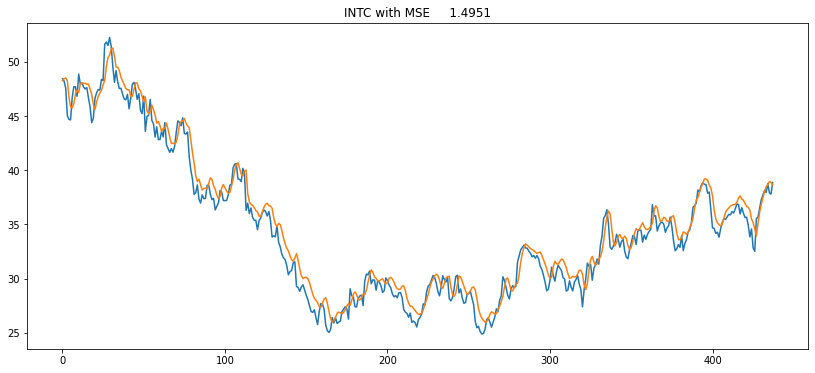

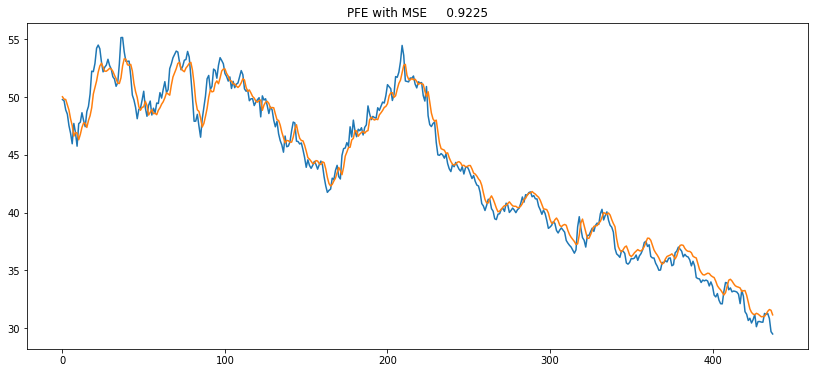

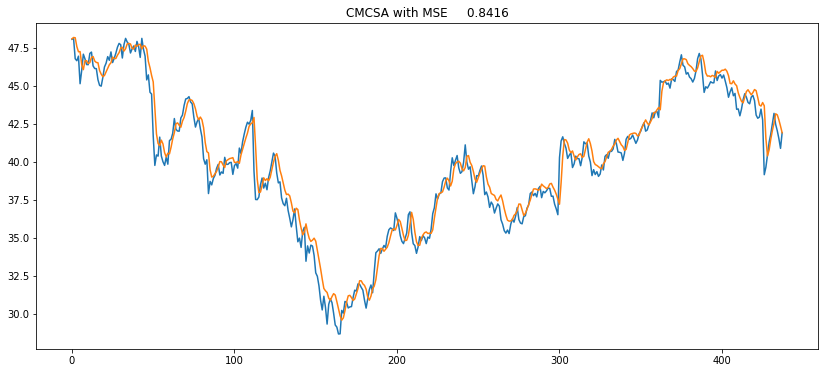

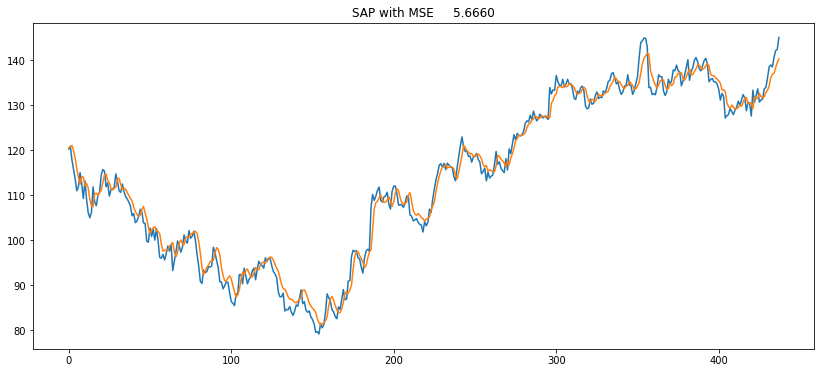

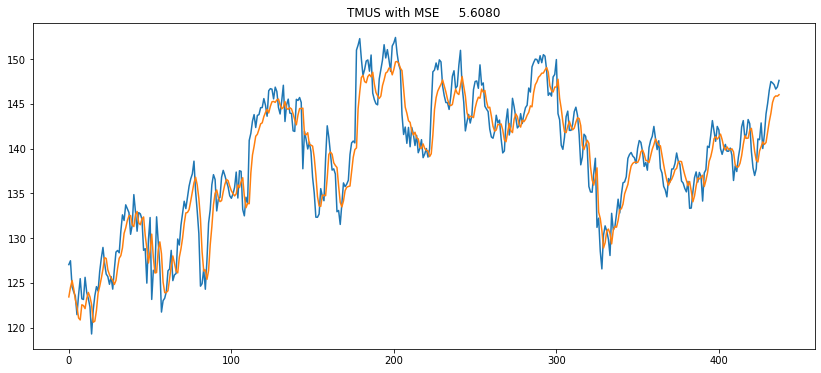

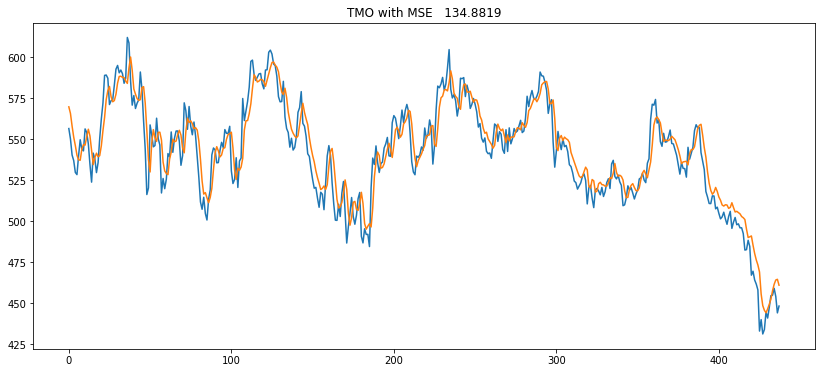

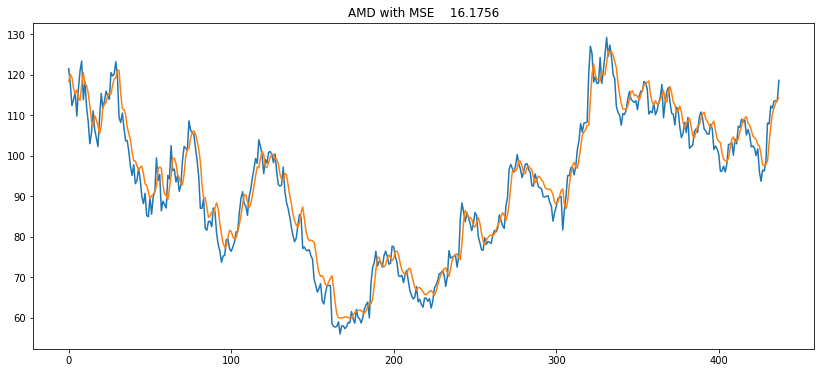

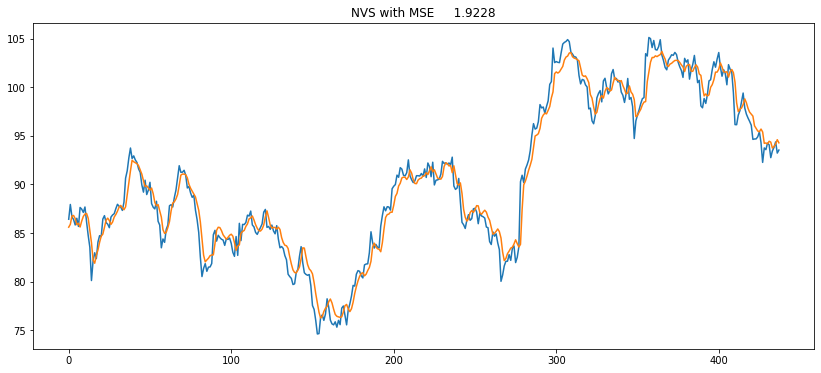

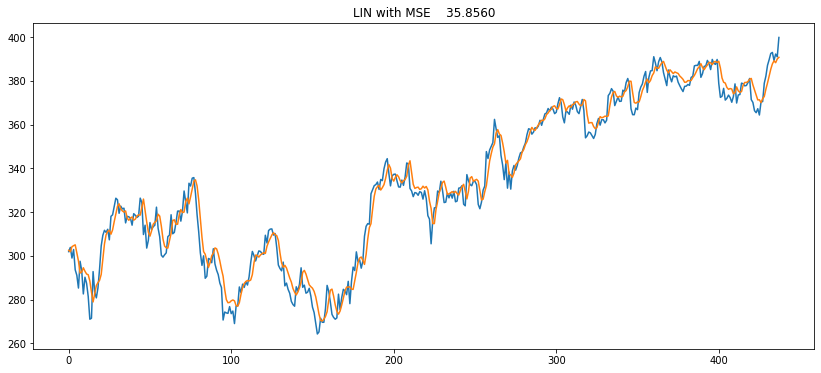

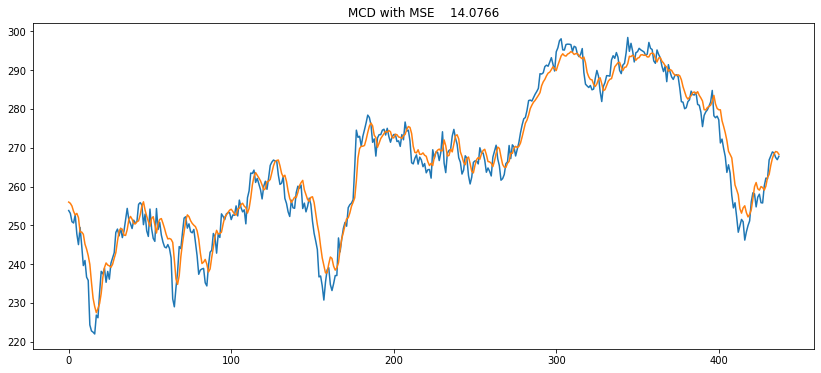

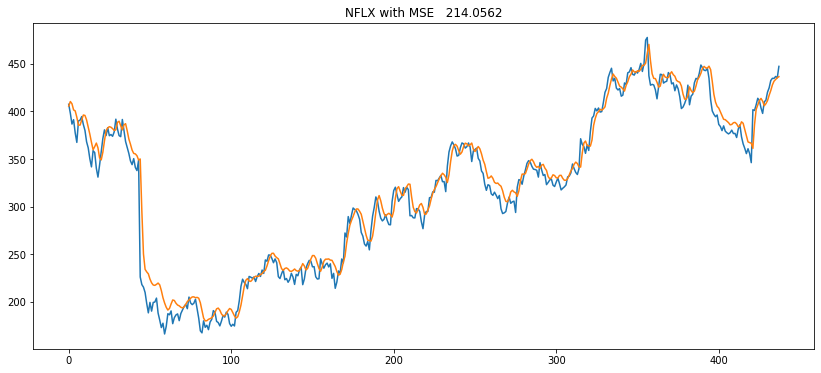

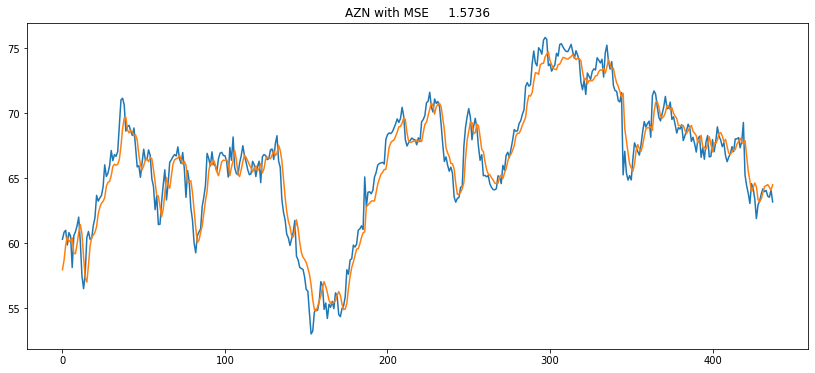

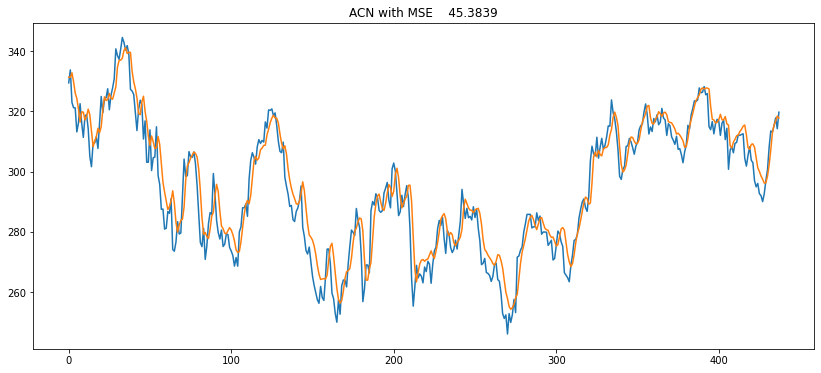

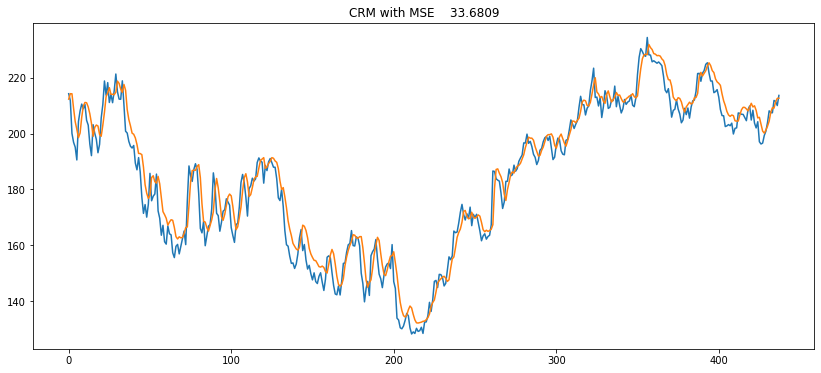

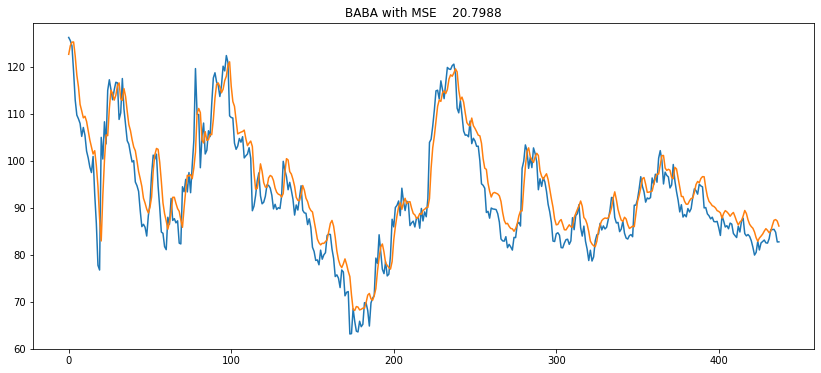

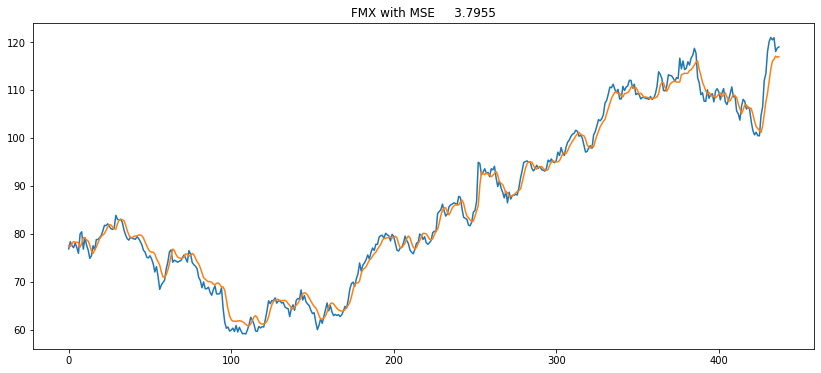

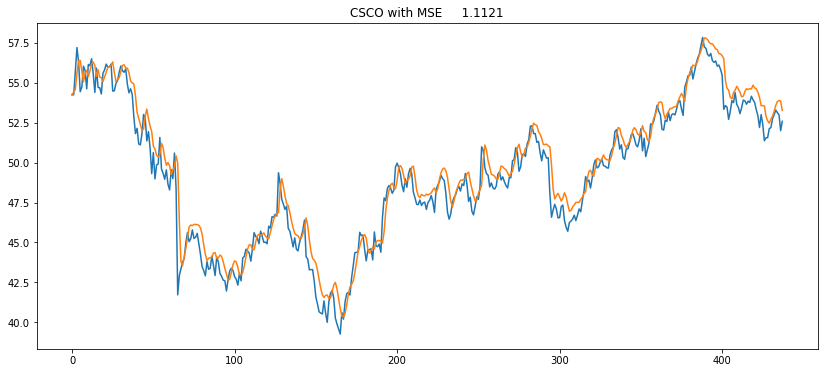

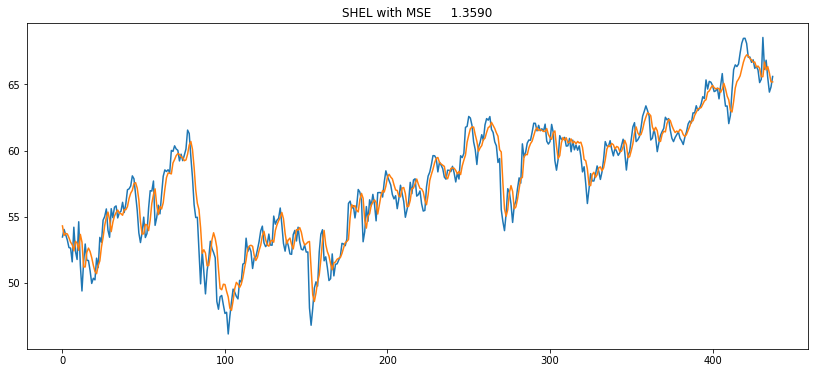

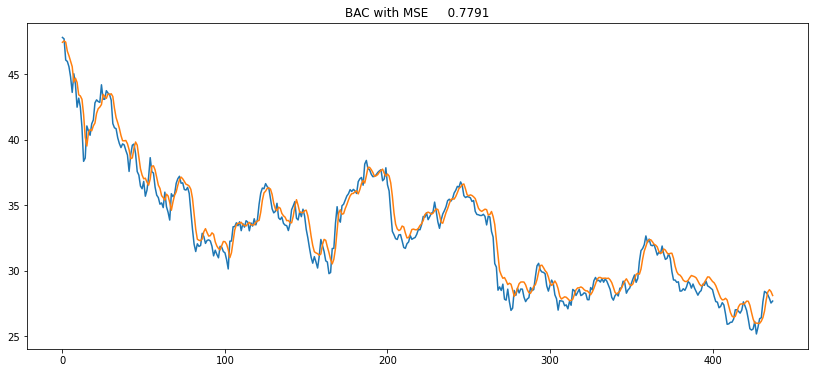

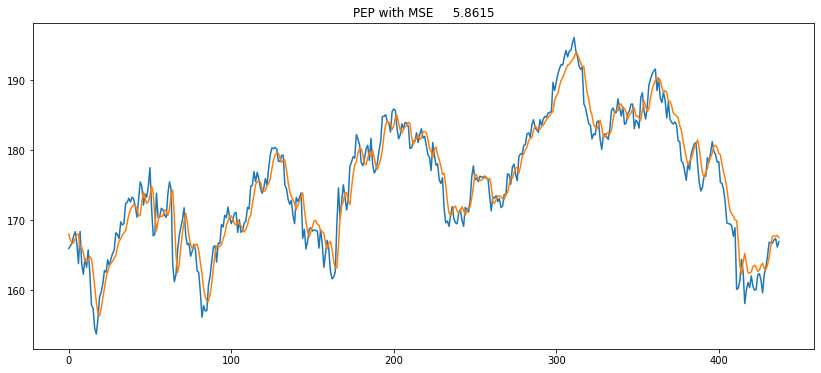

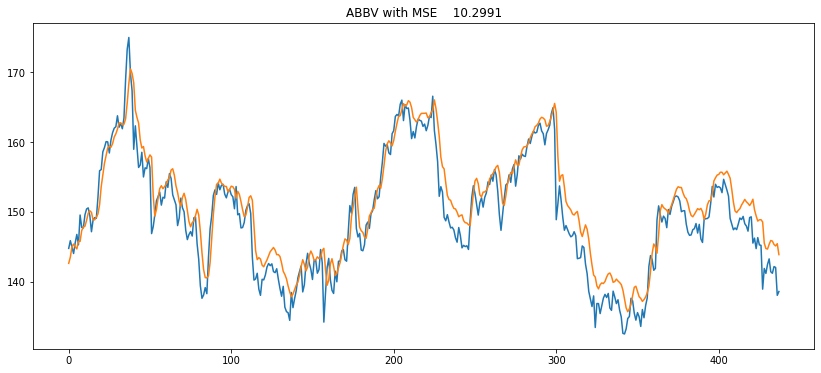

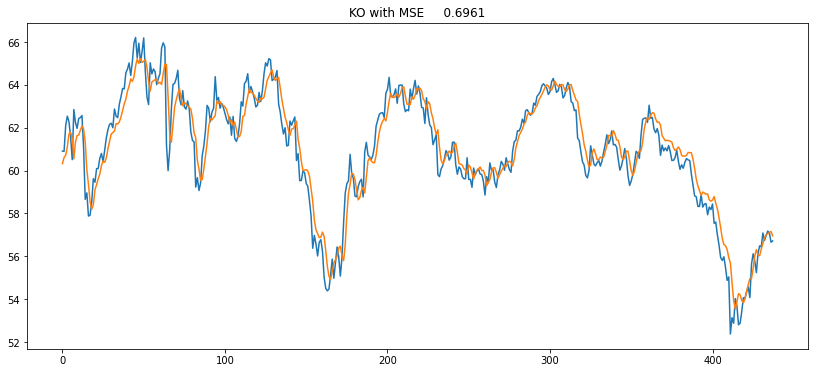

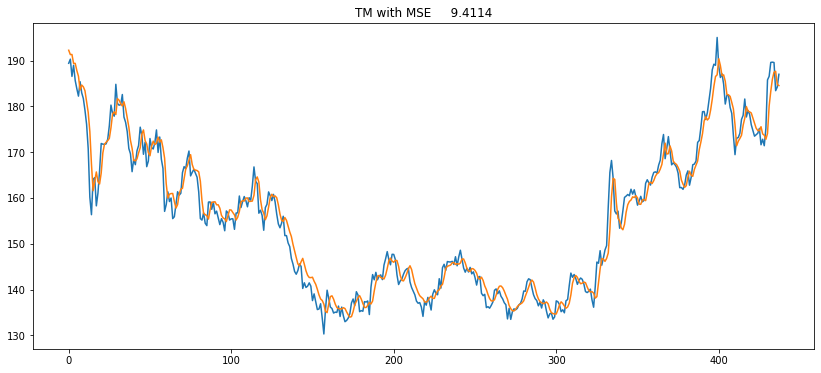

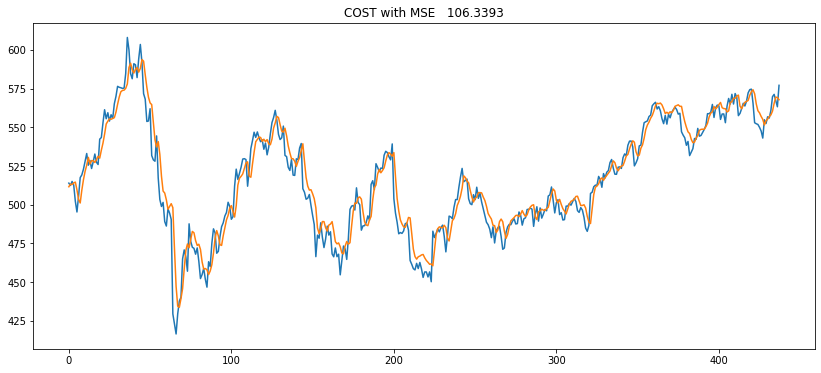

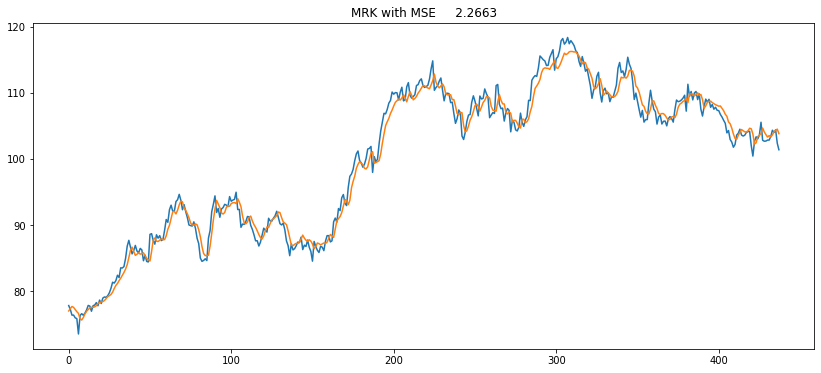

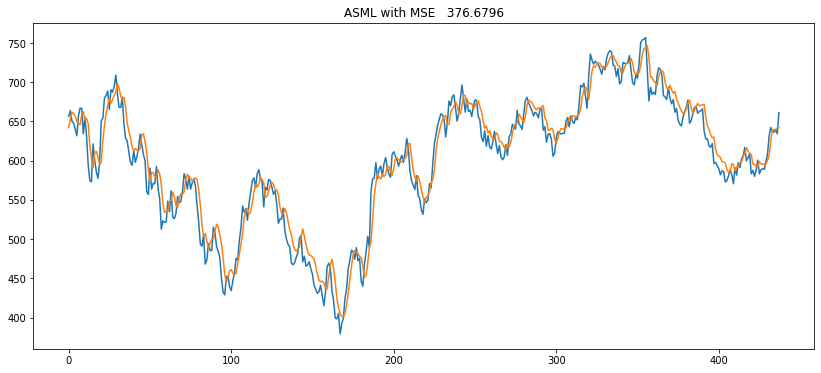

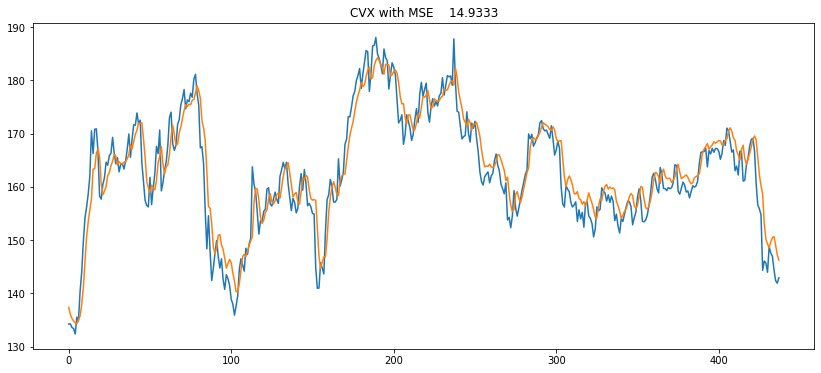

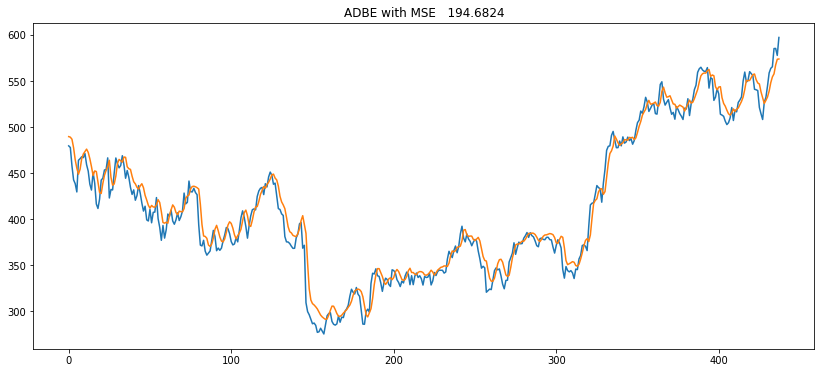

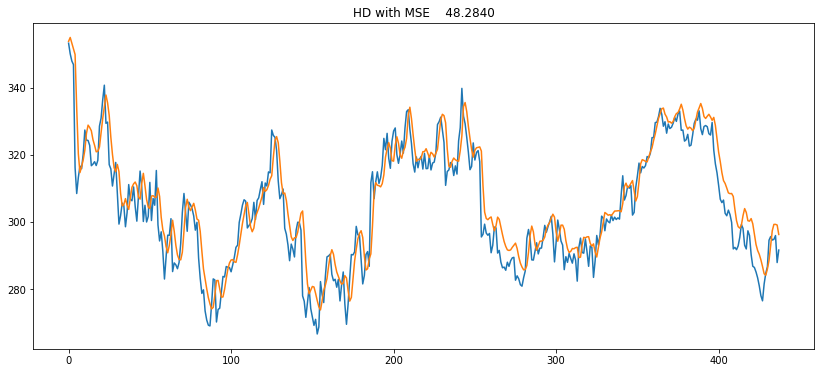

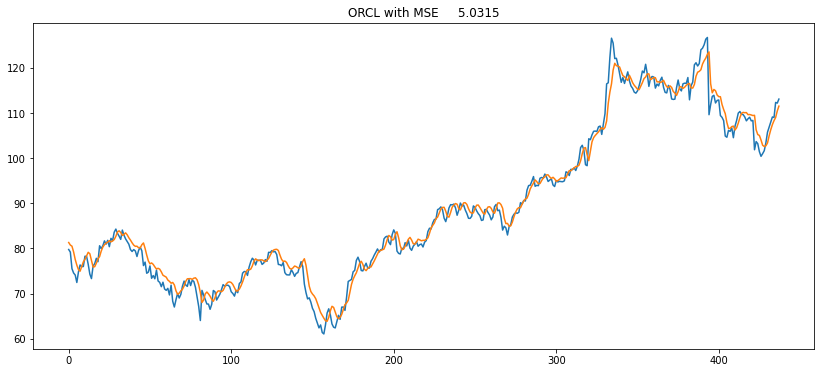

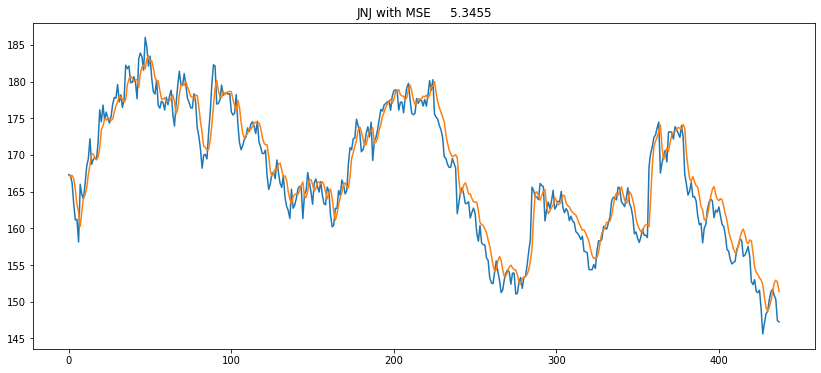

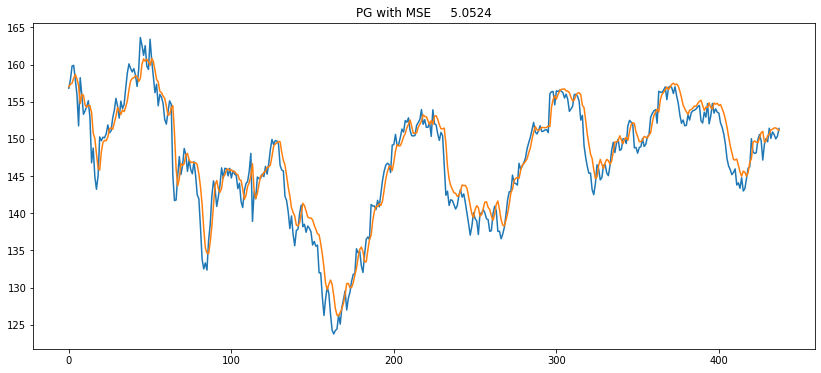

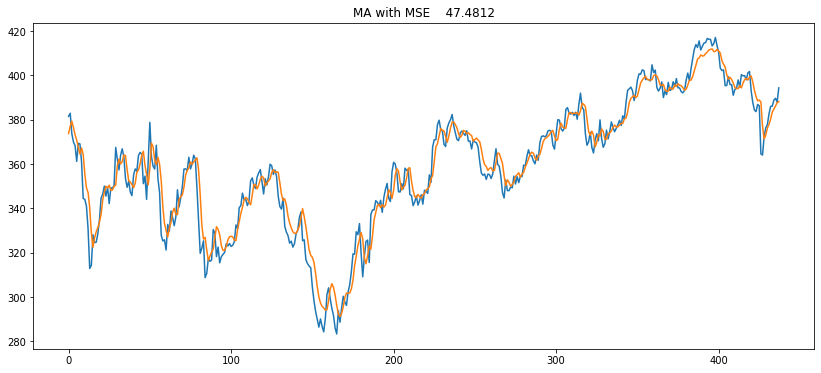

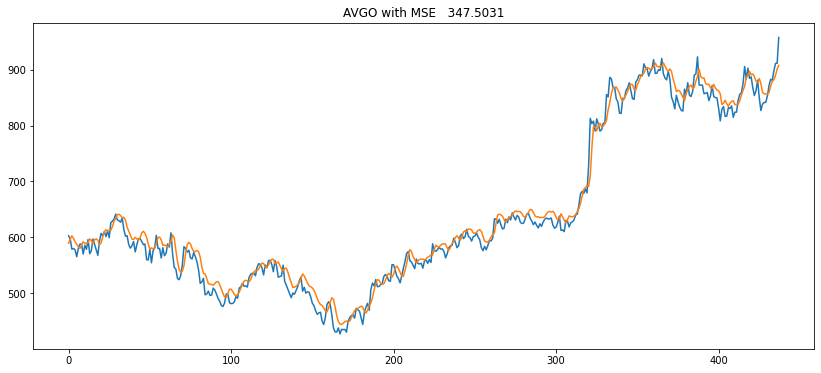

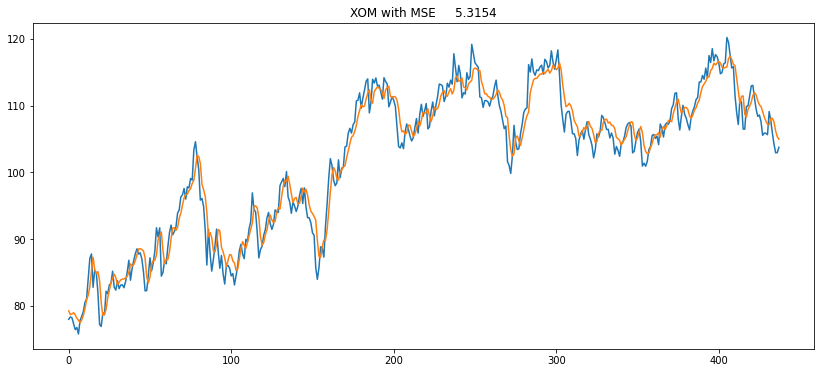

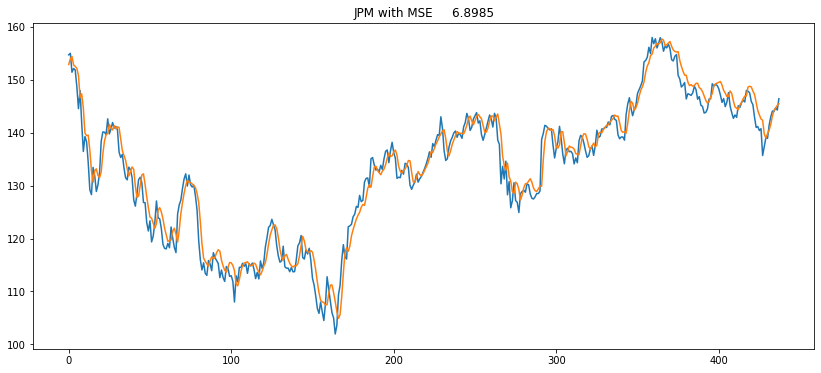

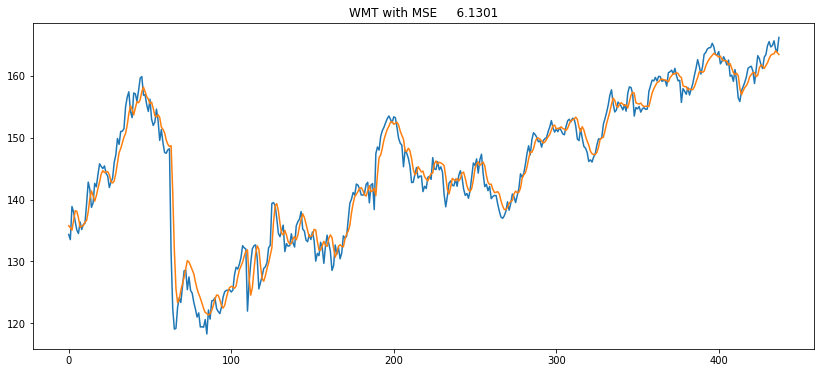

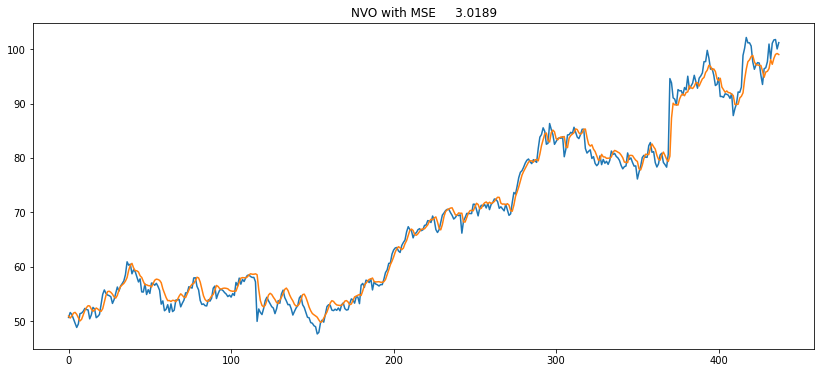

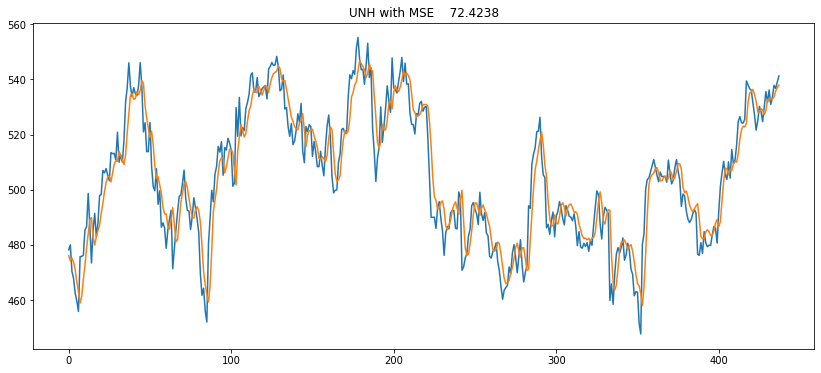

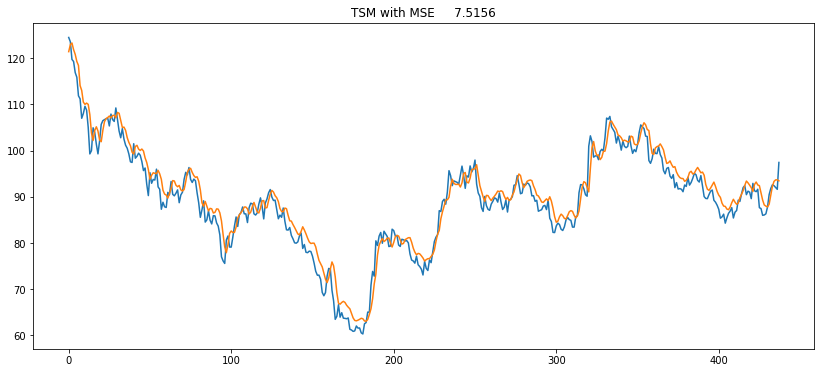

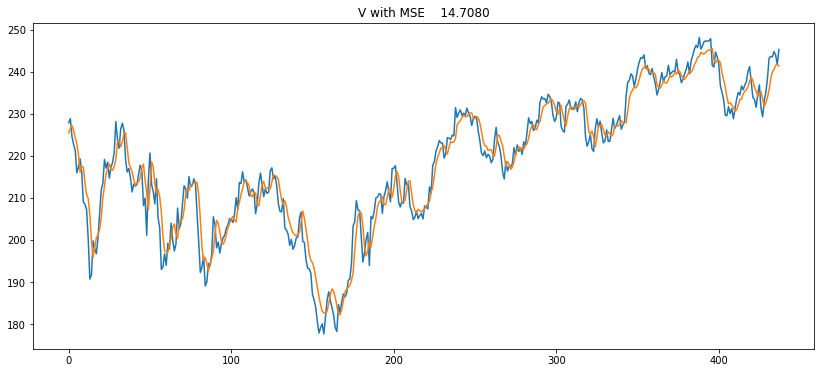

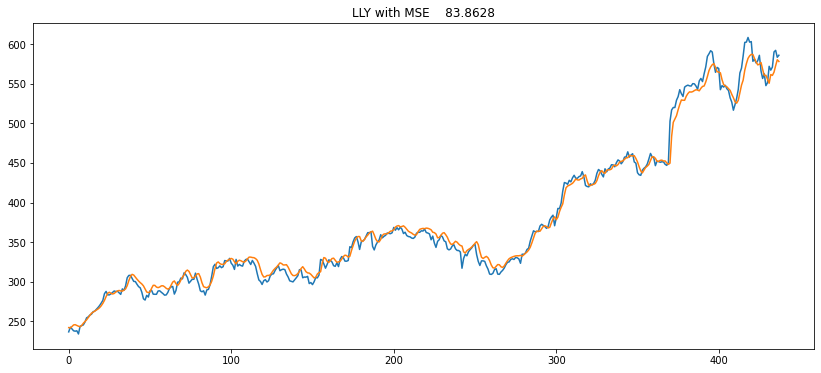

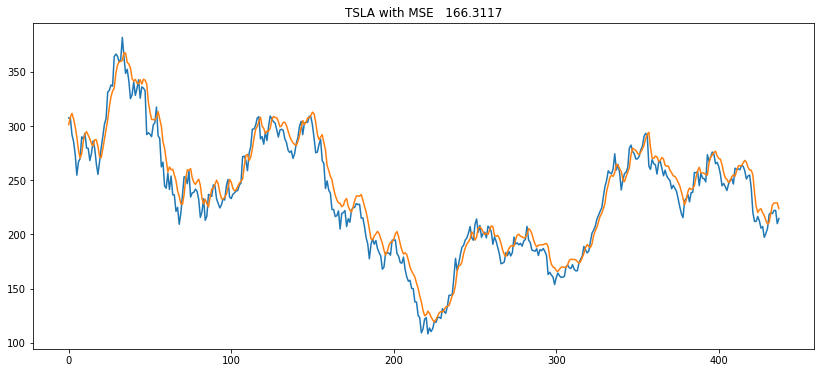

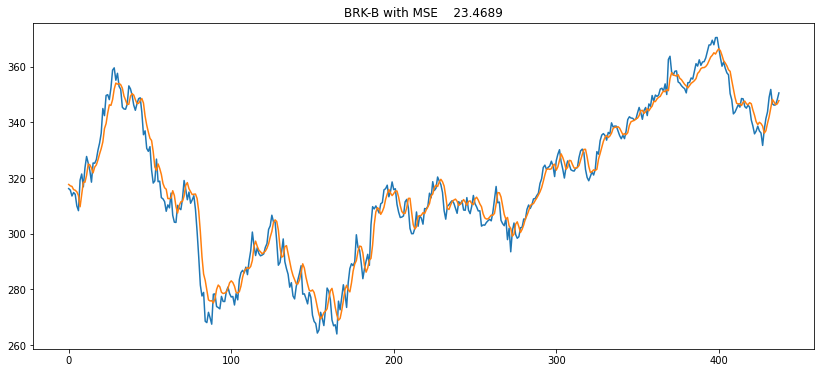

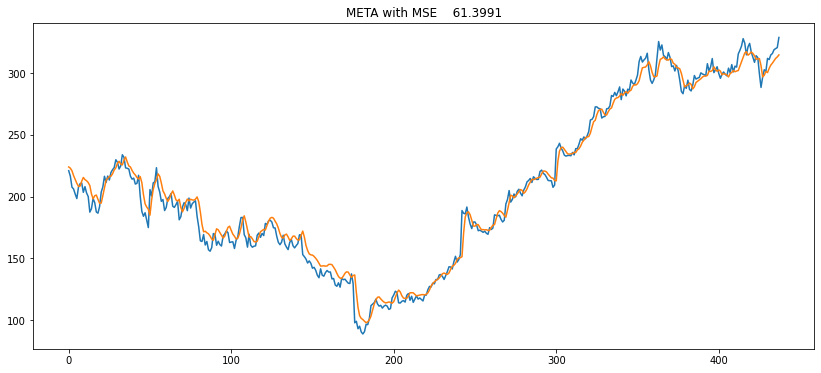

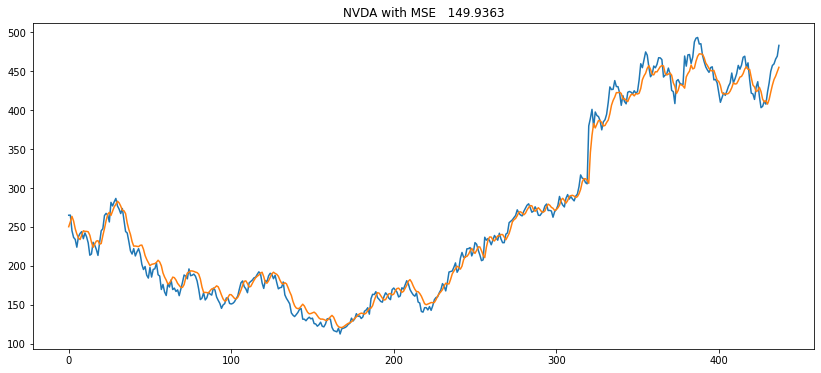

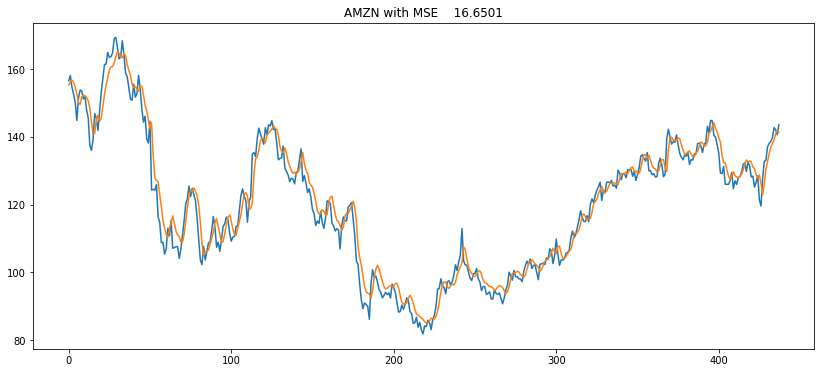

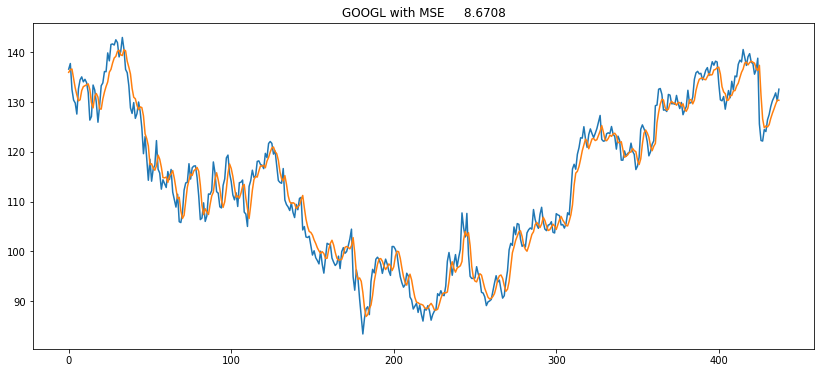

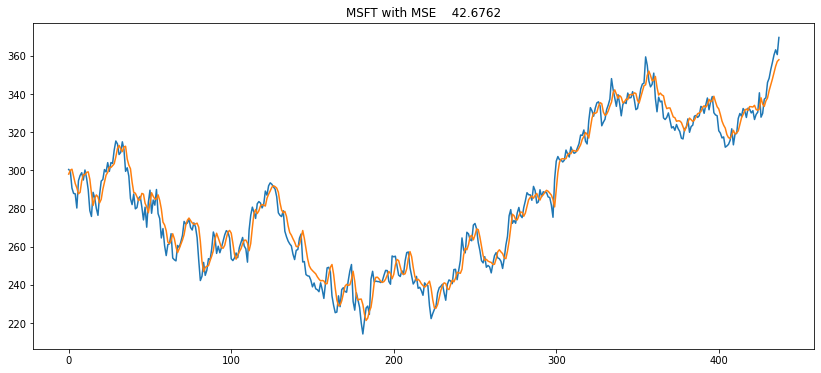

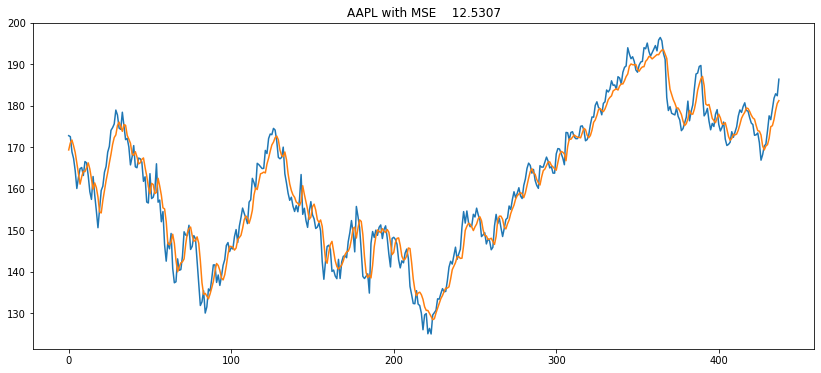

In [22]:
#We need to print the graph of loss count

pred_result = {}
mse_list=[]
for i in stockList:
    # Scale up to the orignial value
    #print(testset[i]["y"])
    y_true_single_column = testset[i]["y"].reshape(-1, 1)
    #print(y_true_single_column)
    y_true_multiple_columns = np.tile(y_true_single_column, (1, featuresize))
    y_true = scaler[i].inverse_transform(y_true_multiple_columns)
    #print(y_true.shape)
    #y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))           # Convert actual price into a column matrix of whatever the datatype is...
    y_pred_single_column = regressor.predict(testset[i]["X"])
    y_pred_multiple_columns = np.tile(y_pred_single_column, (1, featuresize))
    y_pred = scaler[i].inverse_transform(y_pred_multiple_columns)

    #y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))      # Predict 1 price based on each set of 60 datas and save it into a column matrix
    #print(y_pred)
    y_real_true = y_true[:,3]                                            # May need to change the column number
    print(y_real_true.shape)
    #print(y_real_true)

    y_real_pred = y_pred[:,3]                                            # May need to change the column number
    print(y_real_pred.shape)



    MSE = mean_squared_error(y_real_true, y_real_pred)
    mse_list.append(MSE)
    pred_result[i] = {}
    pred_result[i]["True"] = y_real_true    # Blue is actual
    pred_result[i]["Pred"] = y_real_pred    # Yellow is predicted

                     # Add Legend later for better illustration in future
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_real_true)
    plt.plot(y_real_pred)

In [23]:
import csv
import datetime


# Get the current date and time
current_datetime = datetime.datetime.now()

# Create the filename
#filename = f"MSE_list/{current_datetime}.csv"

# Save the mse_list to the CSV file
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["MSE"])  # Write the header
    writer.writerows(zip(mse_list))

NameError: name 'filename' is not defined